# Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

# About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
- Sales -- Unit sales (in thousands) at each location
- Competitor Price -- Price charged by competitor at each location
- Income -- Community income level (in thousands of dollars)
- Advertising -- Local advertising budget for company at each location (in thousands of dollars)
- Population -- Population size in region (in thousands)
- Price -- Price company charges for car seats at each site
- Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
- Age -- Average age of the local population
- Education -- Education level at each location
- Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
- US -- A factor with levels No and Yes to indicate whether the store is in the US or not.

In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Dataset
df=pd.read_csv(r'C:\Users\admin\Documents\Data Science\Assignment\Random_Forests\Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [3]:
#Check for null Value:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
#Check for the data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
#check for shape
df.shape

(400, 11)

In [6]:
#Check for duplicated value
df.duplicated().sum()

0

In [7]:
#Descriptive Analysis
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


### Convert Sales Feature into the catagorical feature

In [8]:
#Descriptive stat for sales column
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <BarContainer object of 10 artists>)

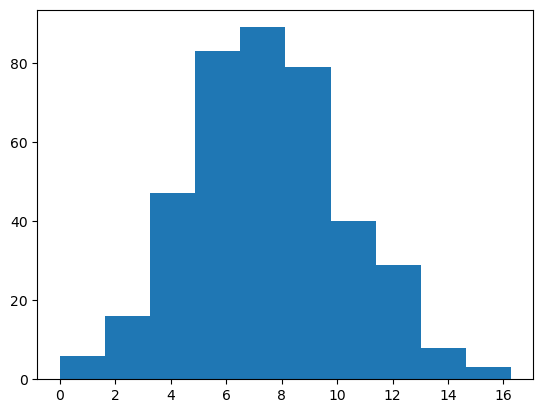

In [9]:
#Check for distribution of sales column
plt.hist(df.Sales)

As sales distribution is not skewed, and is normaly distributed.

so lets devide the sales value in three quartile less than first quartile is low, between second quantile is medium,and above third quantile is high 

In [10]:
df1=df.copy()
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [11]:
#convert the target column in low, medium and high catagory
df1['Sales_Cat']=pd.cut(x=df1['Sales'], bins=[0,5.39,9.32,17],labels=['Low','Medium','High'],right=False)
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Medium
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Medium
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Medium


In [12]:
df1.Sales_Cat.dtype

CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True)

In [13]:
df1.Sales_Cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_Cat, dtype: int64

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_Cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [15]:
#sagrigate the catagorical features
catagorical_features=df1.describe(include=['object','category']).columns
catagorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_Cat'], dtype='object')

In [16]:
df1[catagorical_features].head()

,ShelveLoc,Urban,US,Sales_Cat
0,Bad,Yes,Yes,High
1,Good,Yes,Yes,High
2,Medium,Yes,Yes,High
3,Medium,Yes,Yes,Medium
4,Bad,Yes,No,Low


In [17]:
#sagrigate the numerical features
numerical_features=df1.describe(include=['float64','int64']).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

In [18]:
df1[numerical_features].head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13


# Visualization

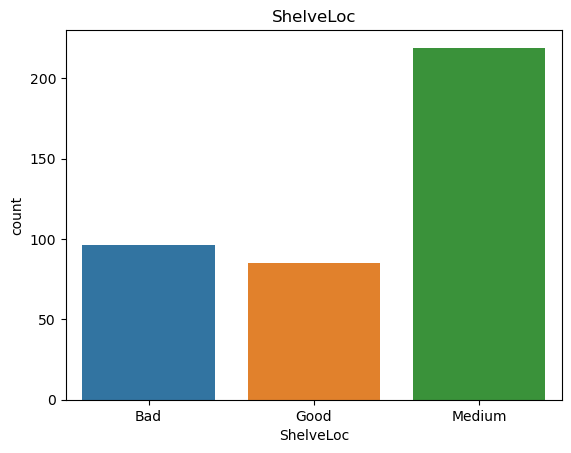

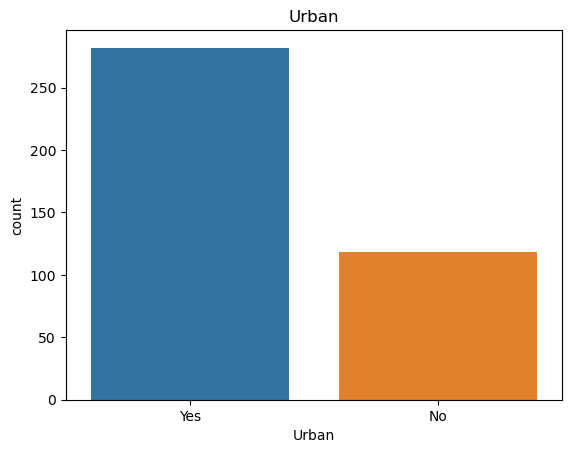

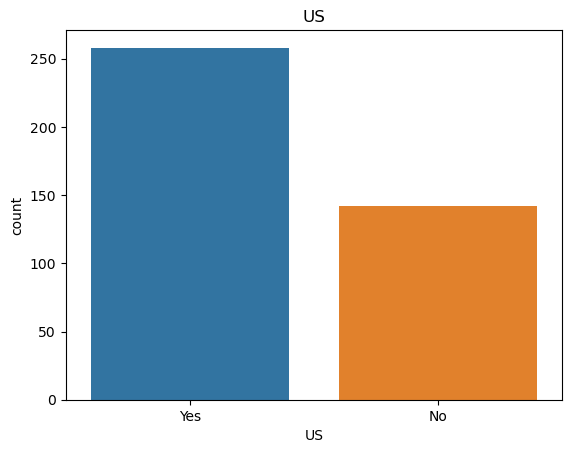

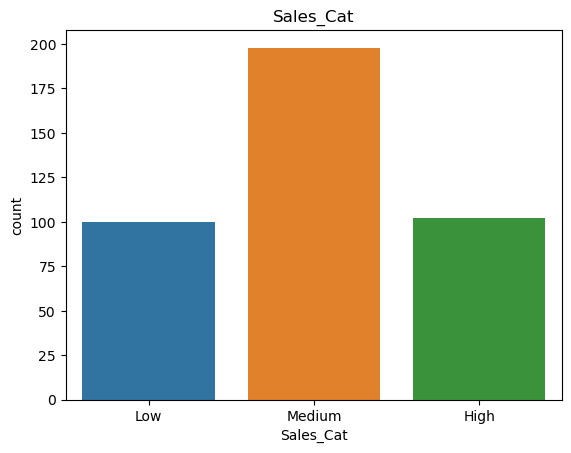

In [19]:
#Check distribution of catagorical features
for feature in catagorical_features:
    data=df1.copy()
    sns.countplot(x=data[feature])
    plt.title(feature)
    plt.show()

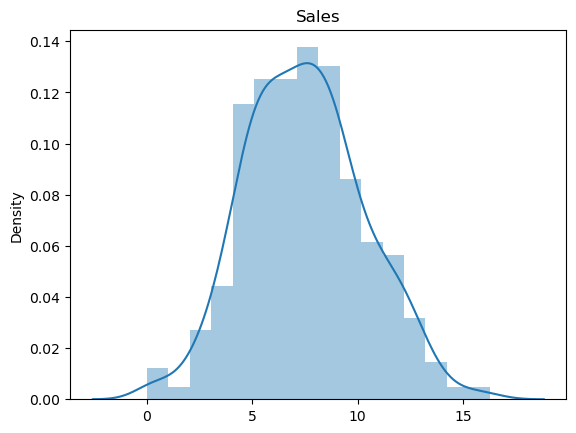

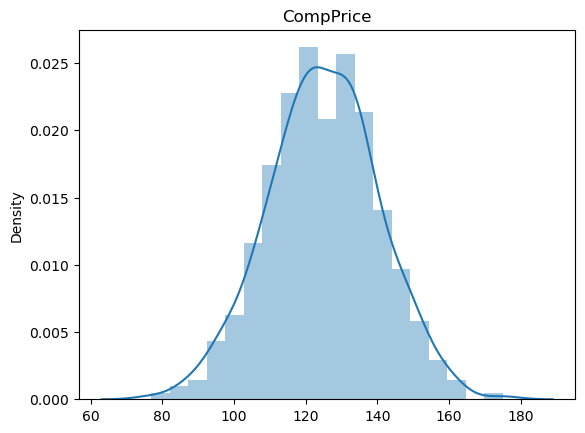

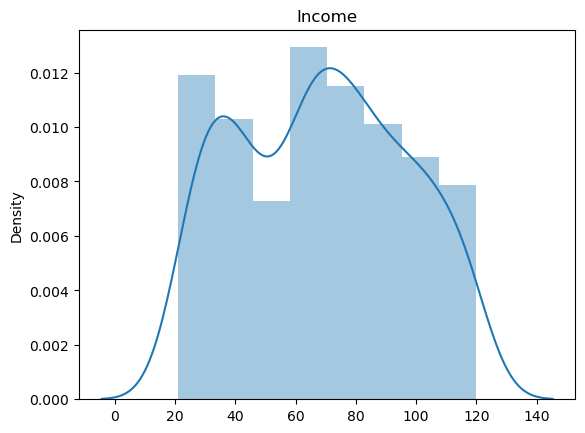

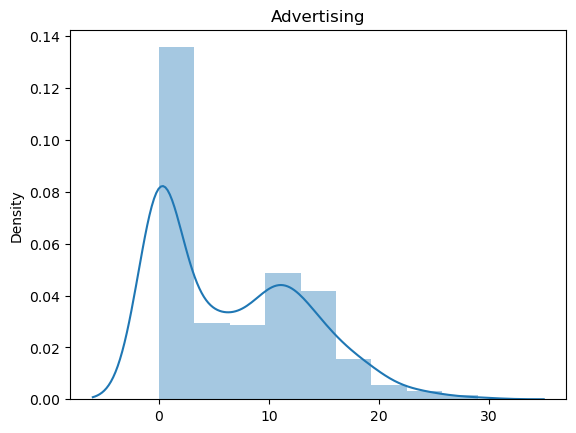

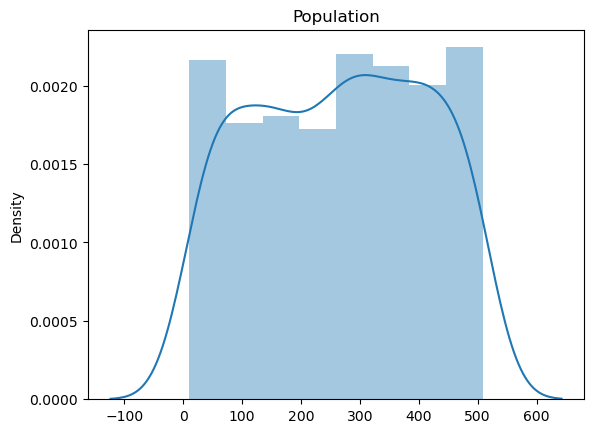

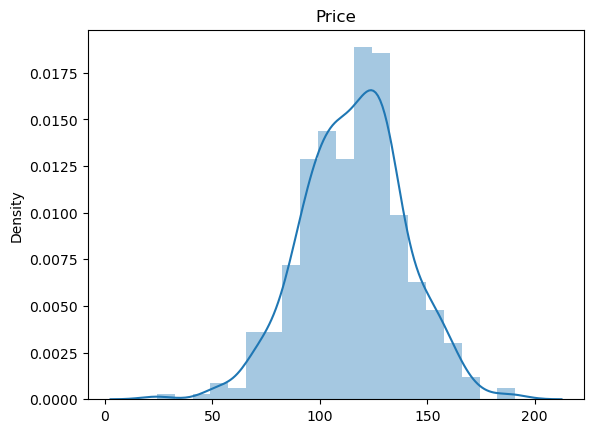

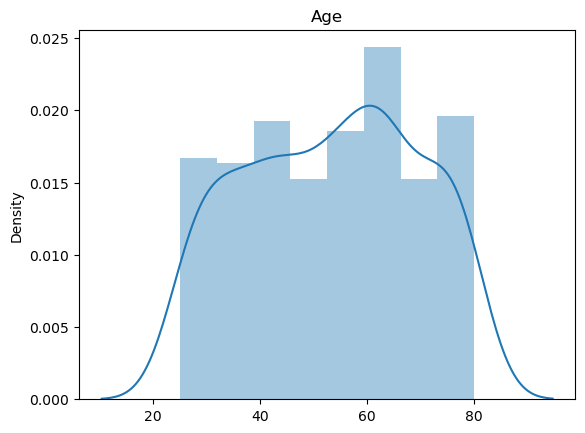

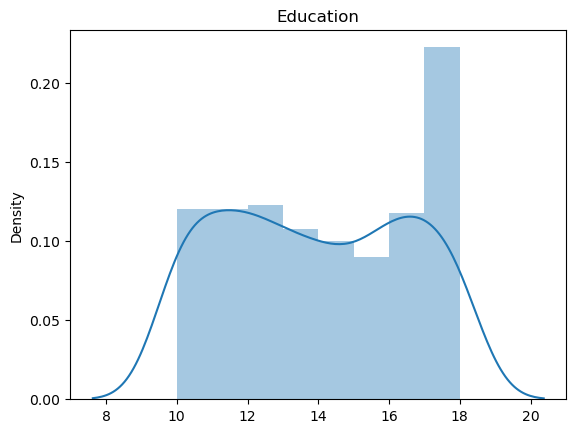

In [20]:
for feature in numerical_features:
    data=df1.copy()
    sns.distplot(x=data[feature])
    plt.title(feature)
    plt.show()

# Feature Engineering

- drop unwanted features
- Handle catagorical feature

In [21]:
df2=df1.copy()

In [22]:
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [23]:
df2.drop(columns=['Sales'],axis=1,inplace=True)

In [24]:
df2.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [25]:
df2['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [26]:
def fn(x):
    df2[x]=df2[x].replace('Good',1)
    df2[x]=df2[x].replace('Medium',2)
    df2[x]=df2[x].replace('Bad',3)

In [27]:
fn('ShelveLoc')

In [28]:
df2['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [29]:
def fn(y):
    df2[y]=df2[y].replace('Yes',1)
    df2[y]=df2[y].replace('No',2)

In [30]:
fn('Urban')
df2['Urban'].value_counts()

1    282
2    118
Name: Urban, dtype: int64

In [31]:
fn('US')
df2['US'].value_counts()

1    258
2    142
Name: US, dtype: int64

In [32]:
# split data in x and y as independent and target columns
x=df2.drop('Sales_Cat',axis=1)
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,2,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [33]:
y=df2[['Sales_Cat']]
y

,Sales_Cat
0,High
1,High
2,High
3,Medium
4,Low
...,...
395,High
396,Medium
397,Medium
398,Medium


In [34]:
#label encoding on target column
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       1, 2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0,
       2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2,
       0, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2,
       2, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 0, 0,
       0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0,
       1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 2,

In [35]:
#split data in train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25, random_state=1)

# Model Building

In [36]:
# build a model as per default parameters
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)
ypred

array([2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 0, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       1, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
#calculte the accuracy
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        18
           1       0.60      0.38      0.46        24
           2       0.69      0.79      0.74        58

    accuracy                           0.67       100
   macro avg       0.65      0.61      0.62       100
weighted avg       0.66      0.67      0.66       100



In [38]:
#check for overfitting model
print('Training Accuracy:',rfc.score(xtrain,ytrain))
print('Testing Accuracy:',rfc.score(xtest,ytest))

Training Accuracy: 1.0
Testing Accuracy: 0.67


##### Model is overfitted. As testing accurancy is high and traing accurancy is very low

### Peform K-Fold cross validation on random forest classifier

In [39]:
kf=KFold(n_splits=10)
score=cross_val_score(rfc,x,y,cv=kf)
score

array([0.65 , 0.725, 0.575, 0.675, 0.7  , 0.6  , 0.675, 0.6  , 0.8  ,
       0.7  ])

In [40]:
score.mean()

0.6699999999999999

# Hyperparameter Tuning

In [41]:
params={
    'n_estimators':[range(1,200)],
    'criterion': ['entropy','gini'],
    'max_depth':[2,3,4,5,6,7,8],
    'min_samples_split':[2,3,4,5,6,7,8],
    'min_samples_leaf':[2,3,4,5,6,7,8],
    'max_features':["auto", "sqrt", "log2"]
}

In [42]:
grid=GridSearchCV(estimator=RandomForestClassifier(), param_grid=params,verbose=2)

In [43]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 2058 candidates, totalling 10290 fits
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_f

[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimator

[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); tota

ValueError: n_estimators must be an integer, got <class 'range'>.

In [44]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': range(1, 200)}

# Final Model Building

In [45]:
model=RandomForestClassifier(criterion='entropy',max_depth=2,max_features='auto',min_samples_split=2,min_samples_leaf=2)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
ypred

array([2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      0.33      0.46        18
           1       0.67      0.08      0.15        24
           2       0.62      0.95      0.75        58

    accuracy                           0.63       100
   macro avg       0.68      0.45      0.45       100
weighted avg       0.65      0.63      0.55       100



In [47]:
print('Training Accuracy:',model.score(xtrain,ytrain))
print('Testing Accuracy:',model.score(xtest,ytest))

Training Accuracy: 0.6366666666666667
Testing Accuracy: 0.63


As we can see the now model is Grenerised.

### Visualize the model

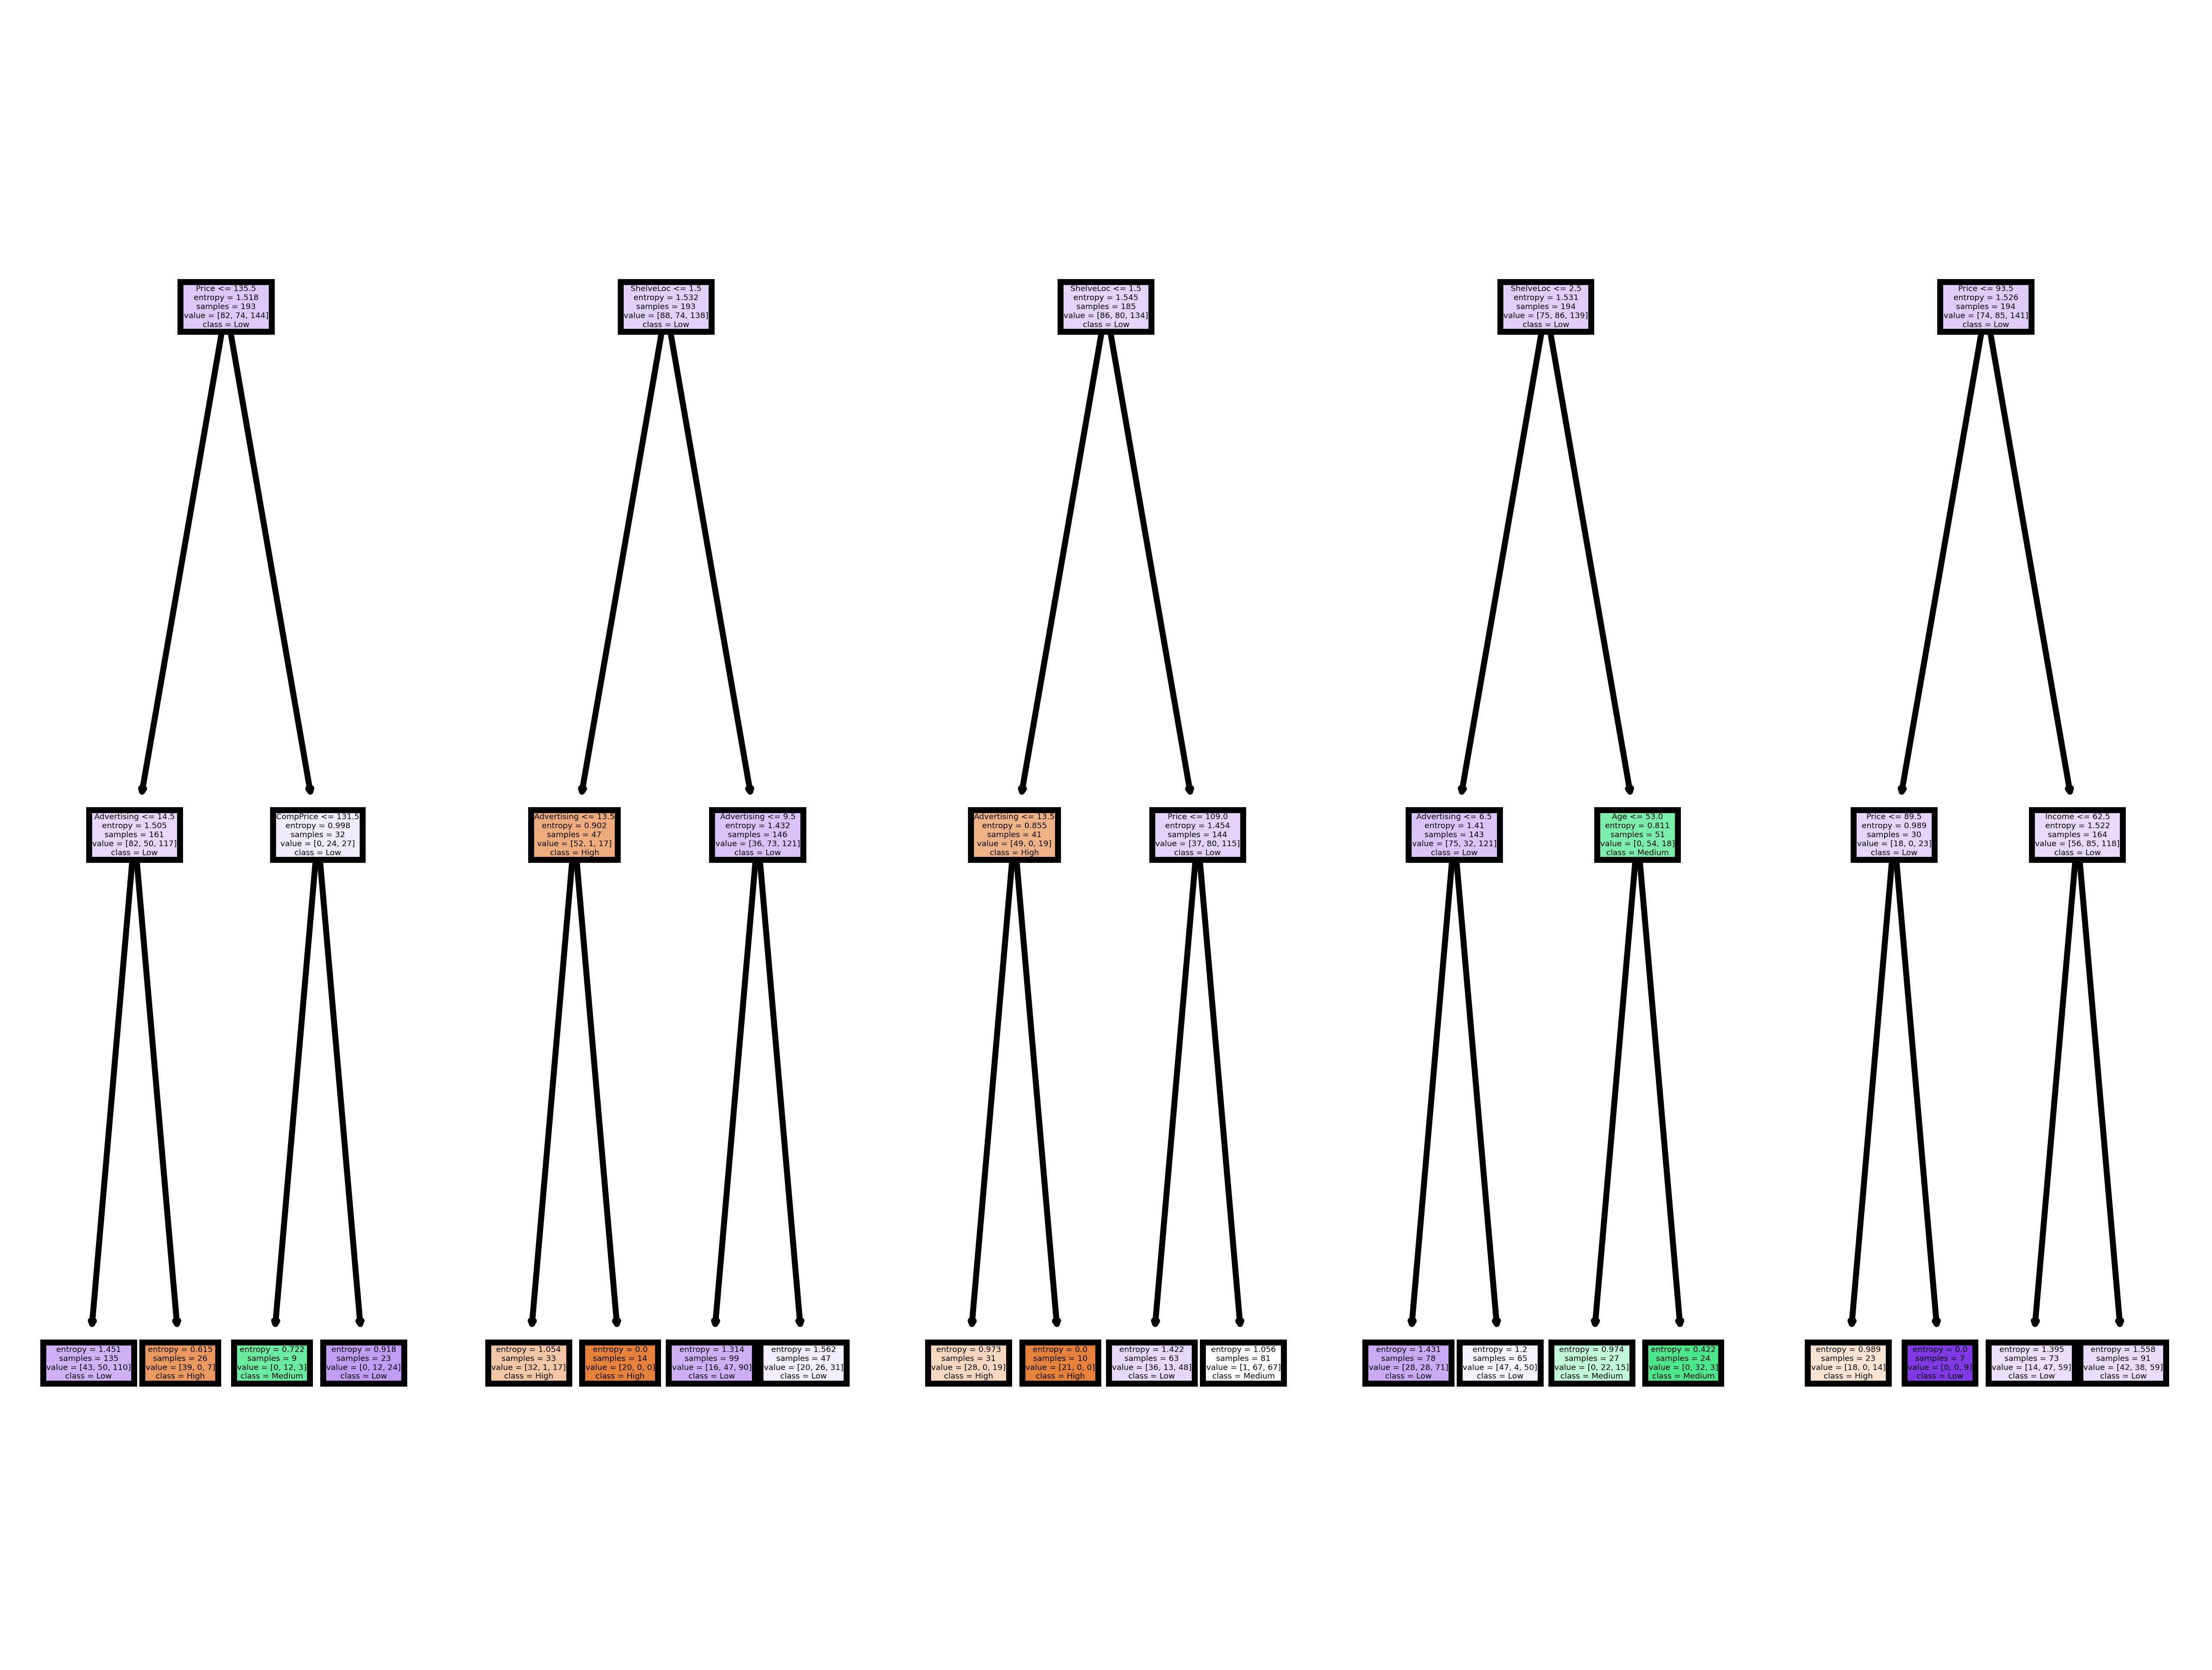

In [48]:
fig,index = plt.subplots(1,5, dpi = 1000)

for i in range(0,5):
    tree.plot_tree(model.estimators_[i],
                  feature_names=x.columns,
                  class_names=df1['Sales_Cat'].unique(),
                   max_depth=2,
                   filled=True,
                  ax = index[i])

# Check accuracy with Bagging Classifier Model

In [49]:
from sklearn.ensemble import BaggingClassifier

In [50]:
bg=BaggingClassifier(base_estimator=model,n_estimators=10)
bg.fit(xtrain,ytrain)
ypred_1=bg.predict(xtest)
print(classification_report(ytest,ypred_1))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29        18
           1       0.67      0.08      0.15        24
           2       0.61      0.98      0.75        58

    accuracy                           0.62       100
   macro avg       0.76      0.41      0.39       100
weighted avg       0.69      0.62      0.52       100



In [51]:
print(bg.score(xtrain,ytrain))
print(bg.score(xtest,ytest))

0.5933333333333334
0.62


# Check accuracy with Decision Tree Classifier Model

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
def predict(model1):
    model1.fit(xtrain,ytrain)
    ypred_=model1.predict(xtest)
    print(classification_report(ytest,ypred_))
    print('Training_accuracy:', model1.score(xtrain,ytrain))
    print('Testing_accuracy:', model1.score(xtest,ytest))

In [56]:
predict(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.47      0.50      0.49        18
           1       0.54      0.62      0.58        24
           2       0.70      0.64      0.67        58

    accuracy                           0.61       100
   macro avg       0.57      0.59      0.58       100
weighted avg       0.62      0.61      0.61       100

Training_accuracy: 1.0
Testing_accuracy: 0.61


In [59]:
from sklearn.svm import SVC

In [60]:
predict(SVC())

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        24
           2       0.58      1.00      0.73        58

    accuracy                           0.58       100
   macro avg       0.19      0.33      0.24       100
weighted avg       0.34      0.58      0.43       100

Training_accuracy: 0.4666666666666667
Testing_accuracy: 0.58
